In [19]:
import pandas as pd

car_models     = pd.read_csv(r"E:\CustomerQuality\Data\car_models.csv")
complaints     = pd.read_csv(r"E:\CustomerQuality\Data\complaints.csv")
ratings        = pd.read_csv(r"E:\CustomerQuality\Data\ratings.csv")
recalls        = pd.read_csv(r"E:\CustomerQuality\Data\recalls.csv")
investigations = pd.read_csv(r"E:\CustomerQuality\Data\investigations.csv")



In [20]:
print(
    f"car_models: {car_models.shape}, "
    f"complaints: {complaints.shape}, "
    f"ratings: {ratings.shape}, "
    f"recalls: {recalls.shape}, "
    f"investigations: {investigations.shape}"
)


car_models: (6082, 3), complaints: (222193, 15), ratings: (1576, 25), recalls: (29664, 15), investigations: (153408, 11)


In [22]:
import pandas as pd
pd.DataFrame(
    [(n, df.shape[0], df.shape[1]) for n, df in dfs.items()],
    columns=["dataset", "rows", "cols"]
)


,dataset,rows,cols
0,car_models,6082,3
1,complaints,222193,15
2,ratings,1576,25
3,recalls,29664,15
4,investigations,153408,11


In [23]:
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  # (safe if already imported)

dfs = {
    "car_models": car_models,
    "complaints": complaints,
    "ratings": ratings,
    "recalls": recalls,
    "investigations": investigations,
}

OUT = Path(r"E:\CustomerQuality\docs\eda")
OUT.mkdir(parents=True, exist_ok=True)


In [24]:
profiles = {}

for name, df in dfs.items():
    total = len(df)
    prof = pd.DataFrame({
        "dtype": df.dtypes.astype(str),
        "non_null": df.notna().sum(),
        "missing": df.isna().sum(),
    })
    prof["missing_pct"] = (prof["missing"] / total * 100).round(2)
    prof["unique"] = df.nunique(dropna=True)
    prof = prof.sort_values("missing_pct", ascending=False)

    profiles[name] = prof

    print(f"\n=== {name.upper()} ===")
    print(f"rows={total}, cols={df.shape[1]}")
    display(prof.head(20))                 # show top 20 by missing %
    prof.to_csv(OUT / f"profile_{name}.csv", index=True)  # save profile



=== CAR_MODELS ===
rows=6082, cols=3


,dtype,non_null,missing,missing_pct,unique
modelYear,int64,6082,0,0.0,11
make,object,6082,0,0.0,356
model,object,6082,0,0.0,2153



=== COMPLAINTS ===
rows=222193, cols=15


,dtype,non_null,missing,missing_pct,unique
vin,object,217160,5033,2.27,79668
manufacturer,object,222188,5,0.00,308
odiNumber,int64,222193,0,0.00,222193
fire,bool,222193,0,0.00,2
numberOfInjuries,int64,222193,0,0.00,14
numberOfDeaths,int64,222193,0,0.00,8
crash,bool,222193,0,0.00,2
dateOfIncident,object,222193,0,0.00,3689
dateComplaintFiled,object,222193,0,0.00,3606
components,object,222192,1,0.00,2168



=== RATINGS ===
rows=1576, cols=25


,dtype,non_null,missing,missing_pct,unique
OverallRating,object,1576,0,0.0,5
OverallFrontCrashRating,object,1576,0,0.0,5
FrontCrashDriversideRating,object,1576,0,0.0,4
FrontCrashPassengersideRating,object,1576,0,0.0,5
OverallSideCrashRating,object,1576,0,0.0,3
SideCrashDriversideRating,object,1576,0,0.0,4
SideCrashPassengersideRating,object,1576,0,0.0,4
combinedSideBarrierAndPoleRating-Front,object,1576,0,0.0,3
combinedSideBarrierAndPoleRating-Rear,object,1576,0,0.0,4
sideBarrierRating-Overall,object,1576,0,0.0,3



=== RECALLS ===
rows=29664, cols=15


,dtype,non_null,missing,missing_pct,unique
NHTSAActionNumber,object,537,29127,98.19,73
overTheAirUpdate,object,27187,2477,8.35,2
Notes,object,29100,564,1.90,57
parkOutSide,object,29519,145,0.49,2
parkIt,object,29519,145,0.49,2
NHTSACampaignNumber,object,29664,0,0.00,6859
Manufacturer,object,29664,0,0.00,498
Summary,object,29664,0,0.00,6869
Component,object,29664,0,0.00,521
ReportReceivedDate,object,29664,0,0.00,2214



=== INVESTIGATIONS ===
rows=153408, cols=11


,dtype,non_null,missing,missing_pct,unique
CDATE,float64,77824,75584,49.27,3297
CAMPNO,object,125403,28005,18.26,2789
MAKE,object,152050,1358,0.89,666
MFR_NAME,object,152050,1358,0.89,589
MODEL,object,152050,1358,0.89,3667
YEAR,float64,152050,1358,0.89,63
COMPNAME,object,152050,1358,0.89,414
SUMMARY,object,152852,556,0.36,2660
ODATE,float64,153251,157,0.10,3470
NHTSA ACTION NUMBER,object,153408,0,0.00,5302


[car_models] No missing values to plot.


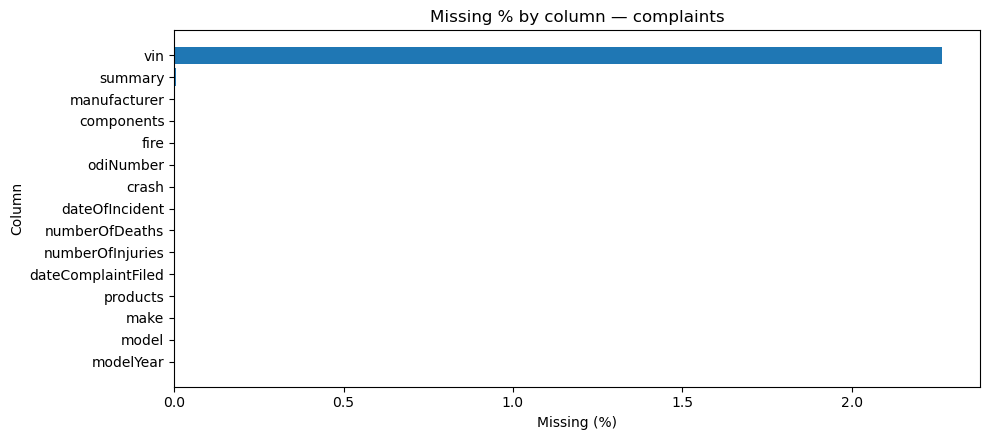

[ratings] No missing values to plot.


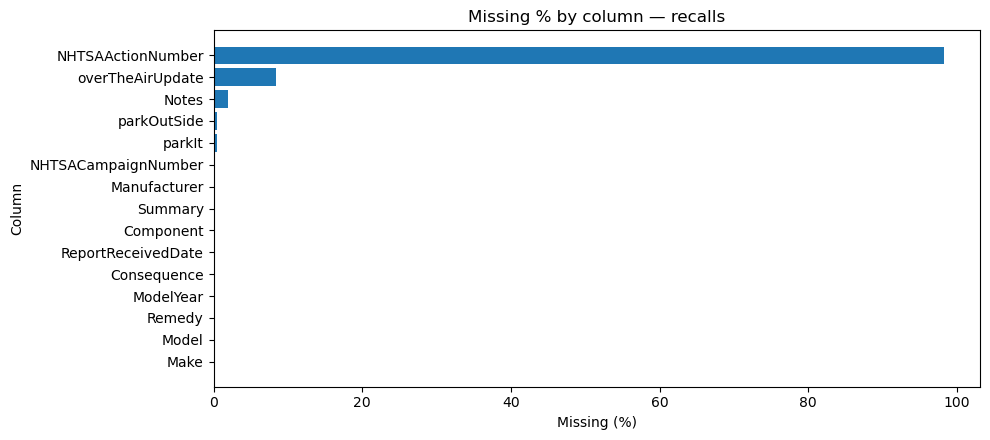

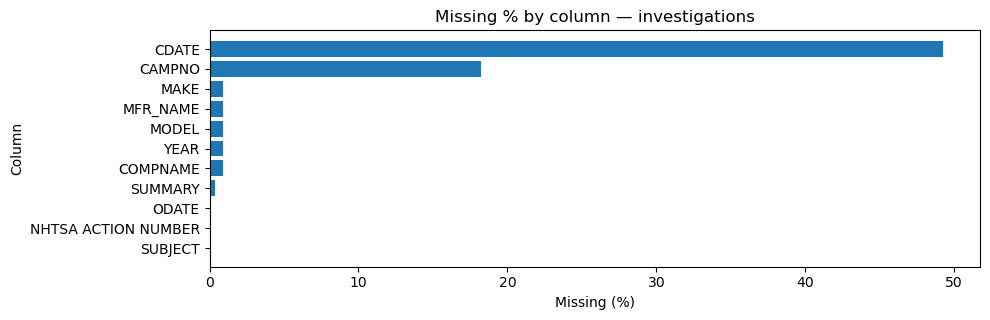

In [25]:
for name, df in dfs.items():
    miss = (df.isna().mean() * 100).sort_values(ascending=False).head(30)

    if miss.empty or float(miss.max()) == 0.0:
        print(f"[{name}] No missing values to plot.")
        continue

    plt.figure(figsize=(10, max(3, 0.3*len(miss))))
    plt.barh(miss.index[::-1], miss.values[::-1])
    plt.title(f"Missing % by column — {name}")
    plt.xlabel("Missing (%)")
    plt.ylabel("Column")
    plt.tight_layout()
    plt.show()


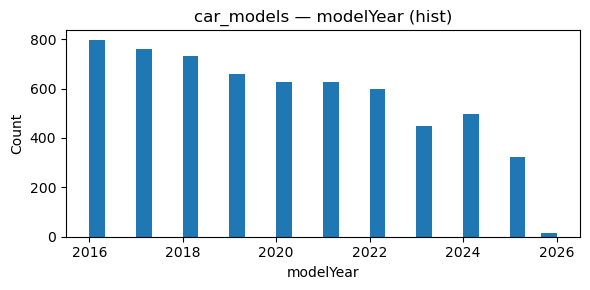

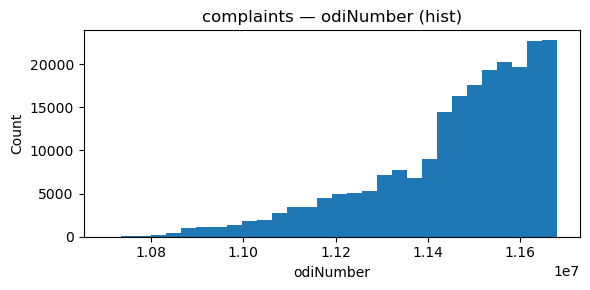

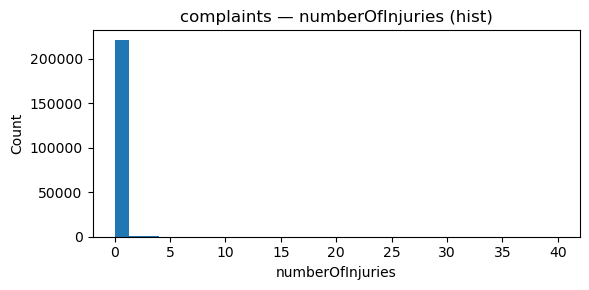

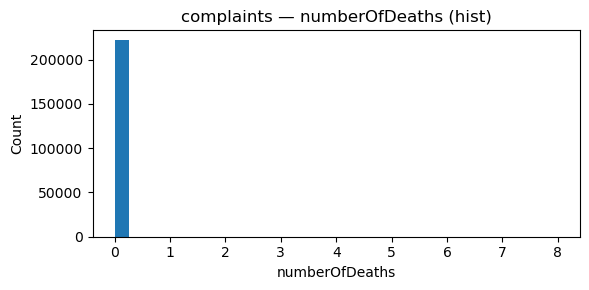

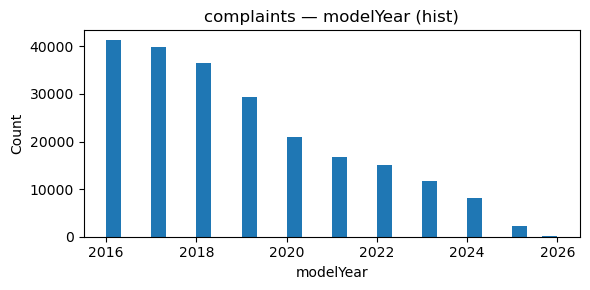

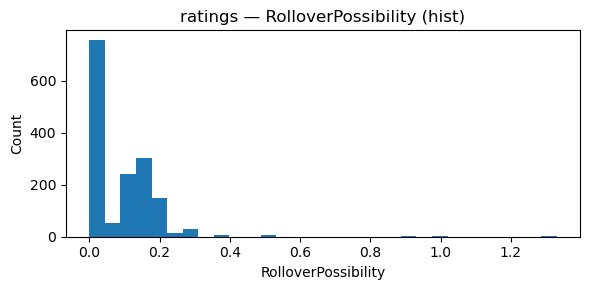

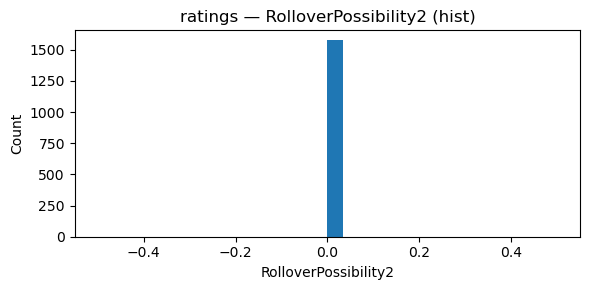

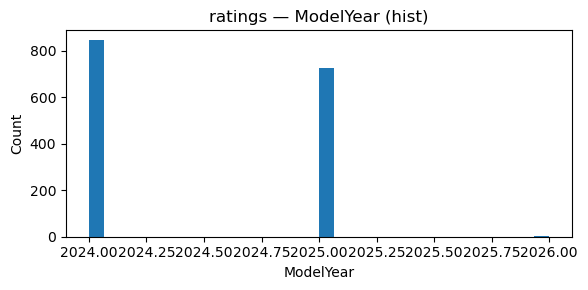

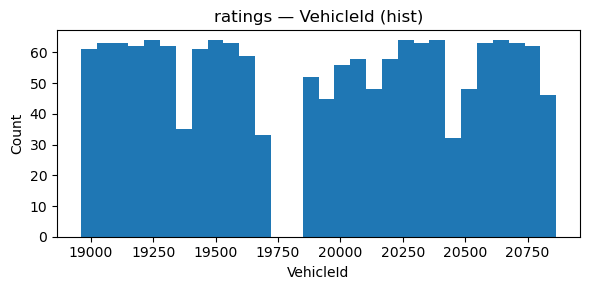

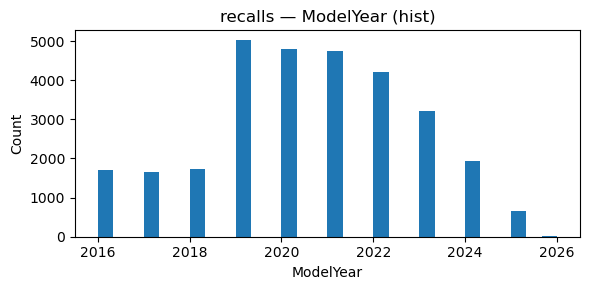

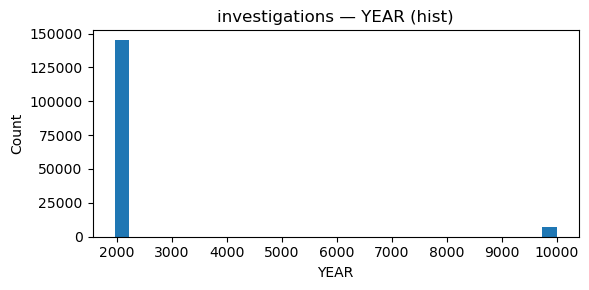

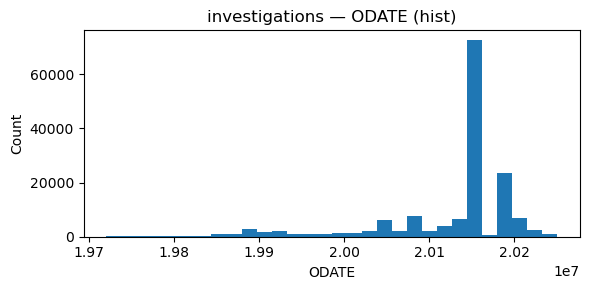

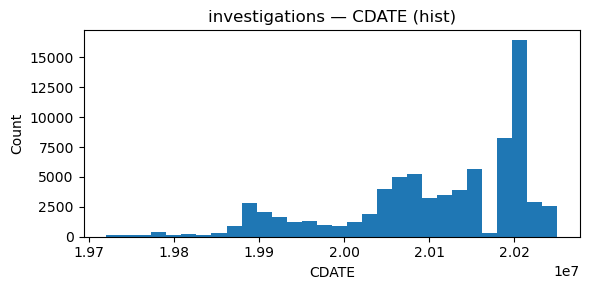

In [26]:
for name, df in dfs.items():
    num_cols = df.select_dtypes(include=[np.number]).columns[:6]

    if len(num_cols) == 0:
        print(f"[{name}] No numeric columns.")
        continue

    for col in num_cols:
        s = pd.to_numeric(df[col], errors="coerce").dropna()
        if s.empty:
            continue
        plt.figure(figsize=(6,3))
        plt.hist(s, bins=30)
        plt.title(f"{name} — {col} (hist)")
        plt.xlabel(col); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()


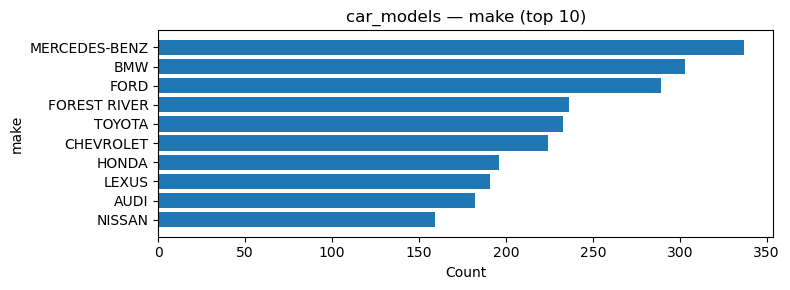

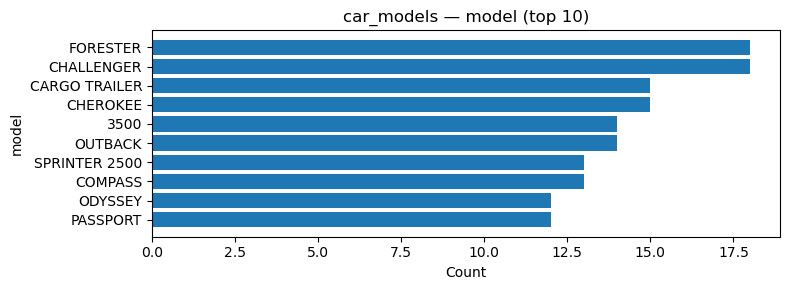

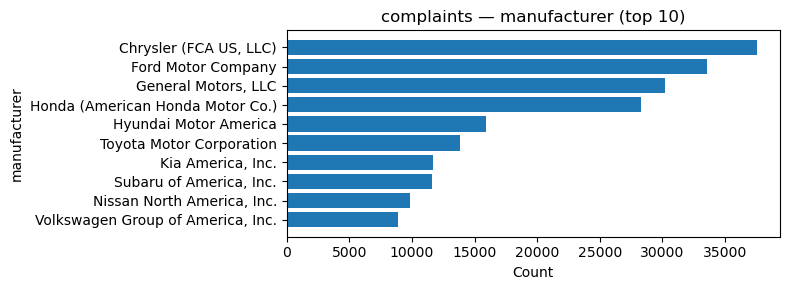

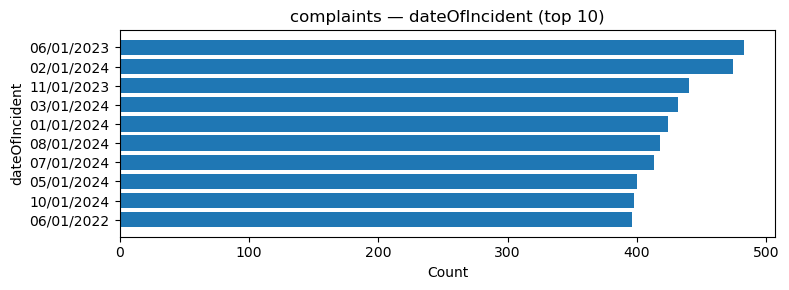

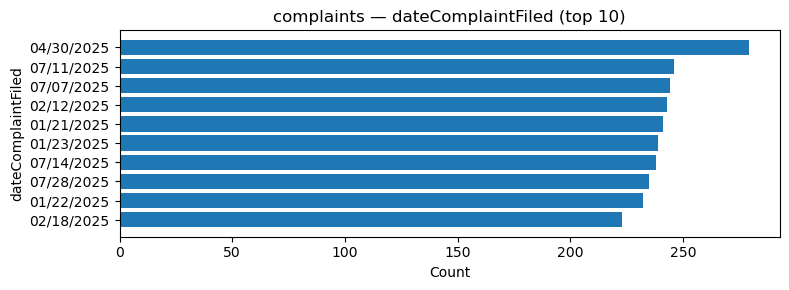

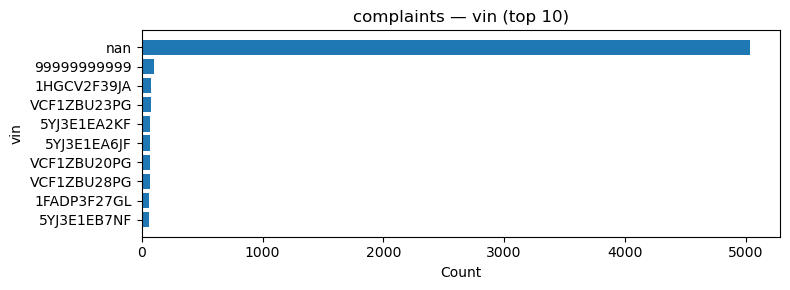

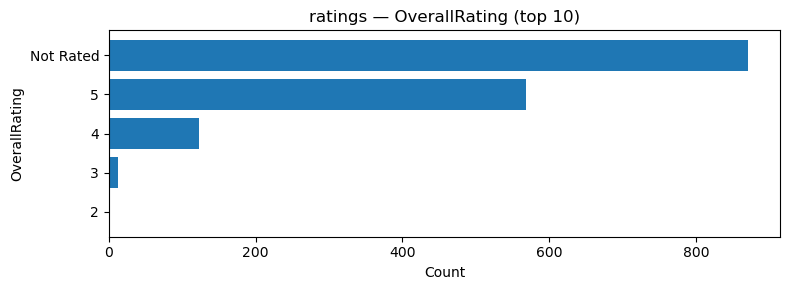

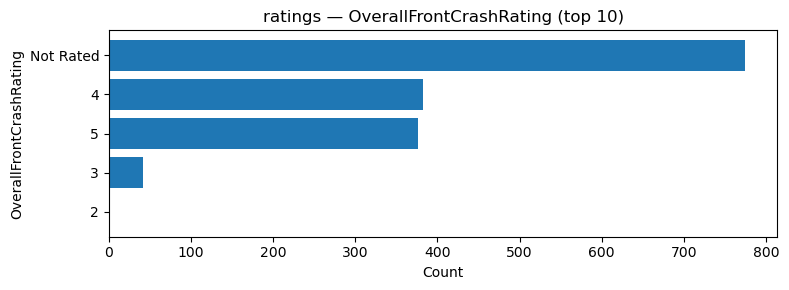

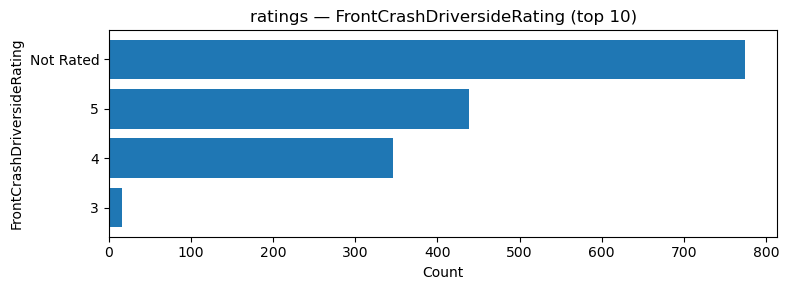

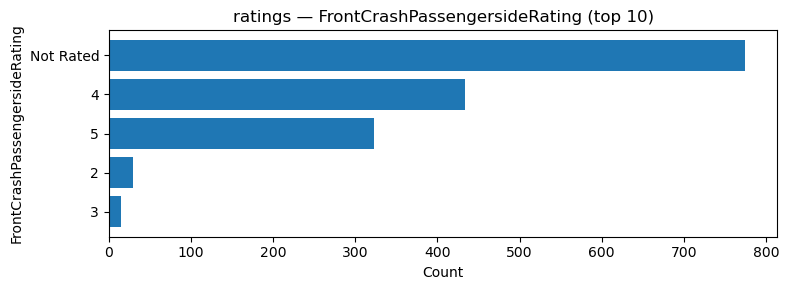

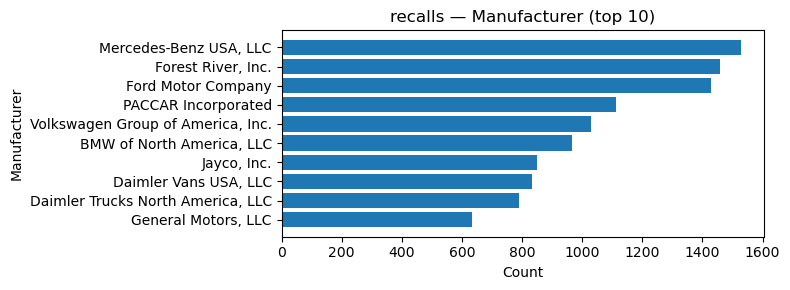

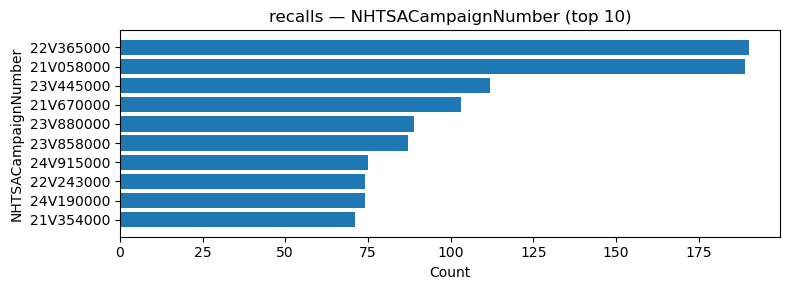

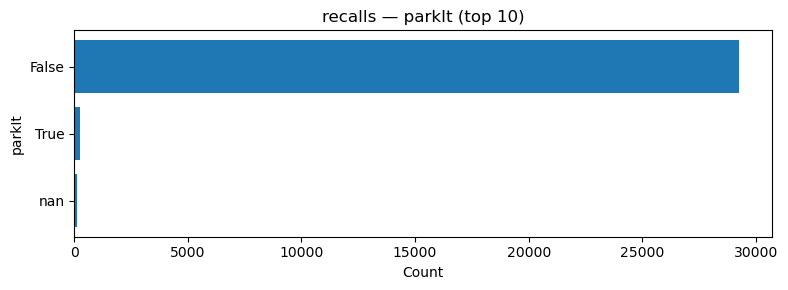

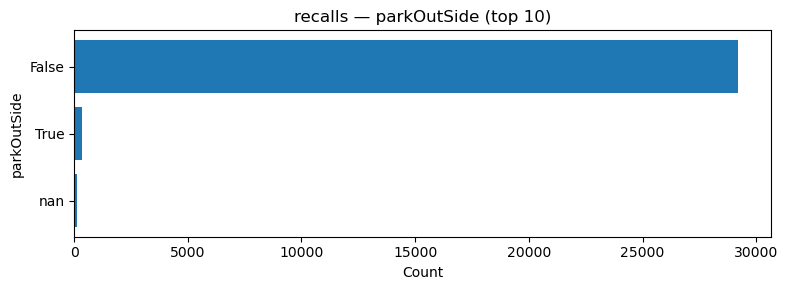

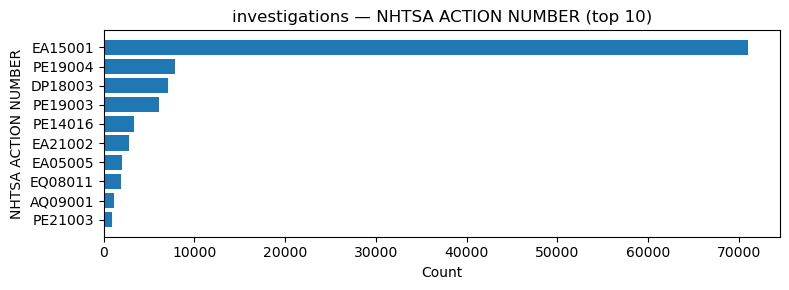

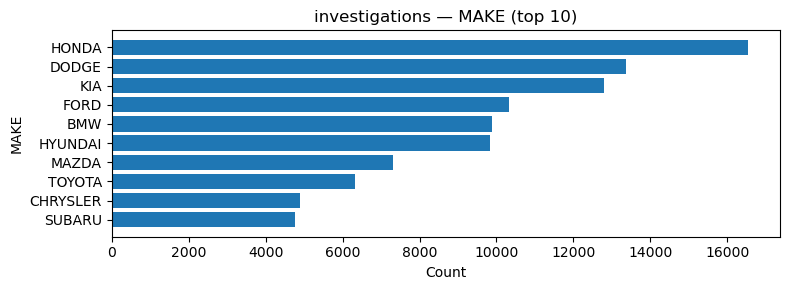

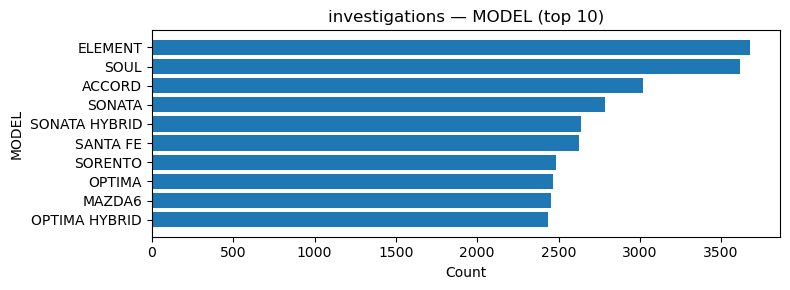

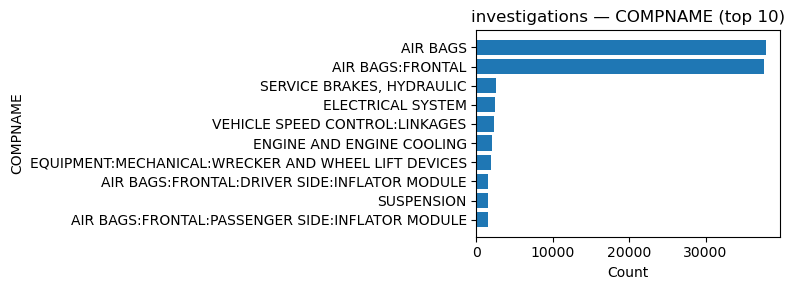

In [27]:
for name, df in dfs.items():
    obj_cols = [c for c in df.columns if df[c].dtype == "object"][:4]

    if len(obj_cols) == 0:
        print(f"[{name}] No categorical/text columns.")
        continue

    for col in obj_cols:
        vc = df[col].astype(str).value_counts().head(10)
        if vc.empty:
            continue
        plt.figure(figsize=(8,3))
        plt.barh(vc.index[::-1], vc.values[::-1])
        plt.title(f"{name} — {col} (top 10)")
        plt.xlabel("Count"); plt.ylabel(col)
        plt.tight_layout()
        plt.show()


[car_models] No date-like columns found.


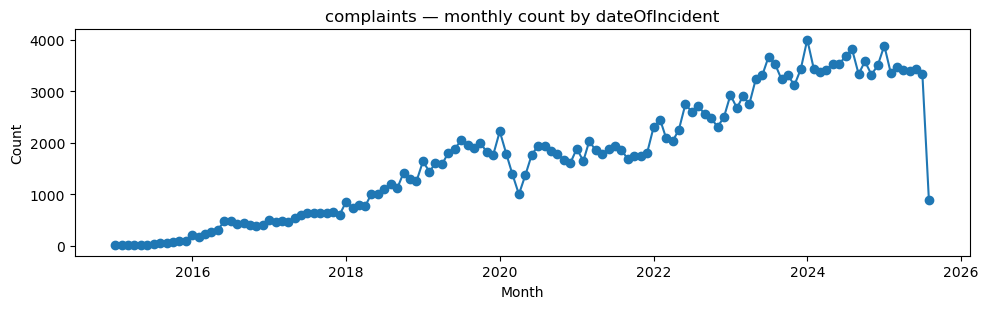

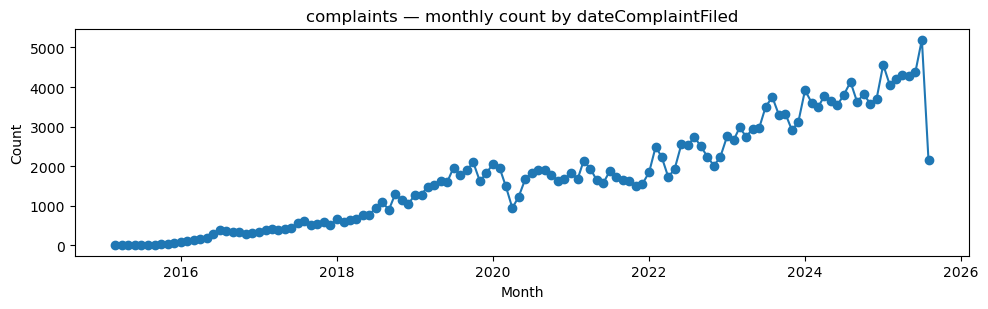

C:\Users\CORE I5\AppData\Local\Temp\ipykernel_16360\1372057314.py:21: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly = s.dropna().dt.to_period("M").value_counts().sort_index()


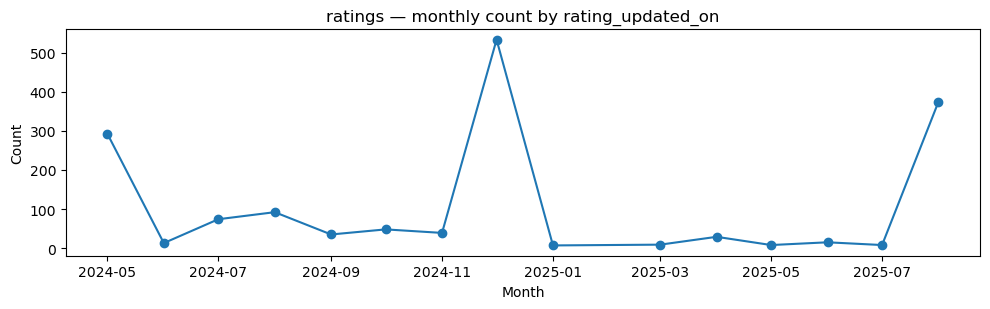

C:\Users\CORE I5\AppData\Local\Temp\ipykernel_16360\1372057314.py:16: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  s = pd.to_datetime(df[dcol], errors="coerce")


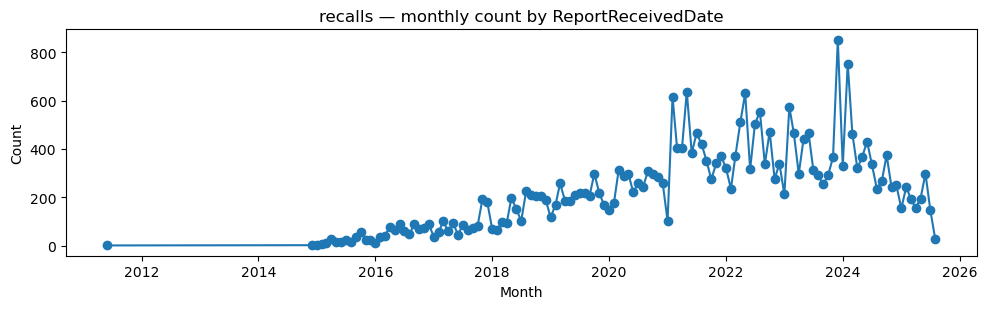

[recalls] 'overTheAirUpdate' has no parseable dates.


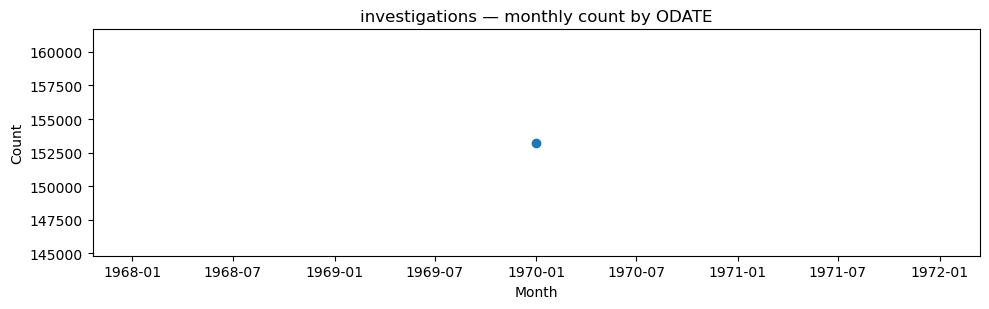

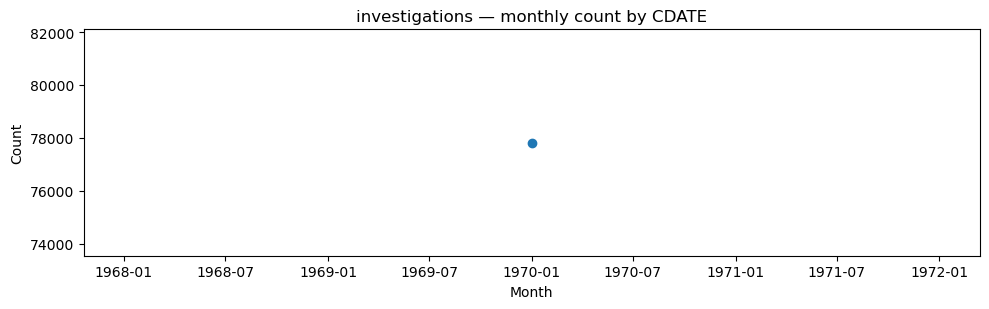

In [28]:
def _find_date_cols(df: pd.DataFrame):
    cands = []
    for c in df.columns:
        cl = c.lower()
        if "date" in cl or cl in ("odate","cdate"):
            cands.append(c)
    return cands

for name, df in dfs.items():
    date_cols = _find_date_cols(df)
    if not date_cols:
        print(f"[{name}] No date-like columns found.")
        continue

    for dcol in date_cols:
        s = pd.to_datetime(df[dcol], errors="coerce")
        if s.notna().sum() == 0:
            print(f"[{name}] '{dcol}' has no parseable dates.")
            continue

        monthly = s.dropna().dt.to_period("M").value_counts().sort_index()
        if monthly.empty:
            print(f"[{name}] No data after monthly grouping for '{dcol}'.")
            continue

        idx = monthly.index.to_timestamp()
        plt.figure(figsize=(10,3.2))
        plt.plot(idx, monthly.values, marker="o")
        plt.title(f"{name} — monthly count by {dcol}")
        plt.xlabel("Month"); plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
